##Import Libraries

In [ ]:
import pandas as pd

##Data Loading and Inspection

###Understand the structure of the dataset.
###Identify the types of information available

In [ ]:
df = pd.read_csv('Vehicle_Insurance.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [ ]:
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


In [ ]:
print(df.describe(include='all'))

                   id  Gender            Age  Driving_License    Region_Code  \
count   381109.000000  381109  381109.000000    381109.000000  381109.000000   
unique            NaN       2            NaN              NaN            NaN   
top               NaN    Male            NaN              NaN            NaN   
freq              NaN  206089            NaN              NaN            NaN   
mean    190555.000000     NaN      38.822584         0.997869      26.388807   
std     110016.836208     NaN      15.511611         0.046110      13.229888   
min          1.000000     NaN      20.000000         0.000000       0.000000   
25%      95278.000000     NaN      25.000000         1.000000      15.000000   
50%     190555.000000     NaN      36.000000         1.000000      28.000000   
75%     285832.000000     NaN      49.000000         1.000000      35.000000   
max     381109.000000     NaN      85.000000         1.000000      52.000000   

        Previously_Insured Vehicle_Age 

##Data Cleaning:
###Handle missing values and outliers appropriately.

### Check Missing Values

In [ ]:
print(df.isnull().sum())


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


###Drop Rows with Missing Critical Targets or IDs

In [ ]:
df = df.dropna(subset=['id', 'Response'])
print("After dropping rows missing 'id' or 'Response':")
print(df.isnull().sum())


After dropping rows missing 'id' or 'Response':
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


###Impute Numeric Columns Missing Values with Mean

In [ ]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
print("Missing values after numeric imputation:")
print(df[num_cols].isnull().sum())


Missing values after numeric imputation:
id                      0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


/tmp/ipython-input-1508783791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


###Impute Categorical Columns Missing Values with Mode

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("Missing values after categorical imputation:")
print(df[cat_cols].isnull().sum())


/tmp/ipython-input-2587065313.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Missing values after categorical imputation:
Gender            0
Vehicle_Age       0
Vehicle_Damage    0
dtype: int64


###Outlier Treatment Using IQR for Numeric Columns

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=low_bound, upper=up_bound)

print("Outlier treatment applied on numeric columns.")


Outlier treatment applied on numeric columns.


##Data Visualization:
###Utilize various visualization techniques to explore the distribution of key
variables.

##Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###Histogram for Age Distribution

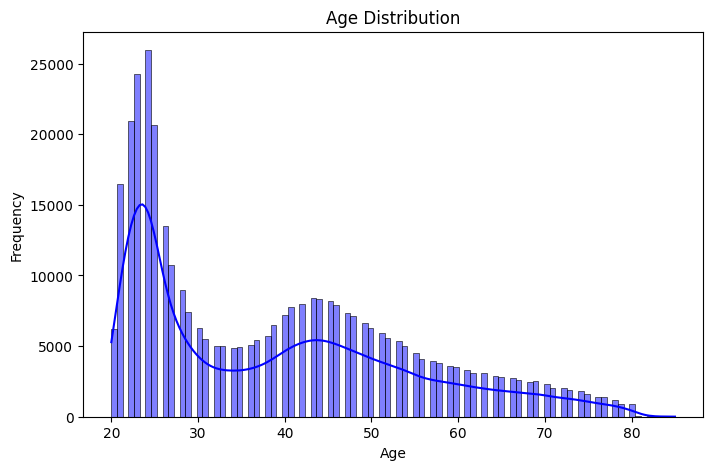

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###Boxplot for Age grouped by Claim Response

/tmp/ipython-input-2895764656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Age', data=df, palette='Set2')


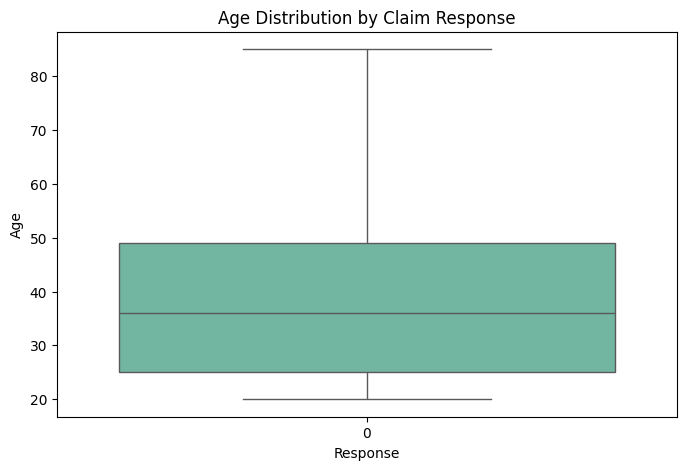

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Claim Response')
plt.show()


###Histogram for Annual Premium Distribution

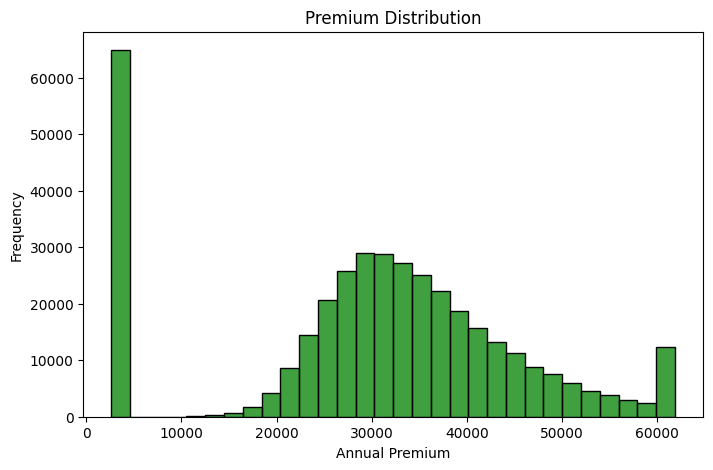

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Annual_Premium'], bins=30, color='green')
plt.title('Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()


###Violin Plot for Premium grouped by Claim Response

/tmp/ipython-input-819274388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Response', y='Annual_Premium', data=df, palette='Pastel1')


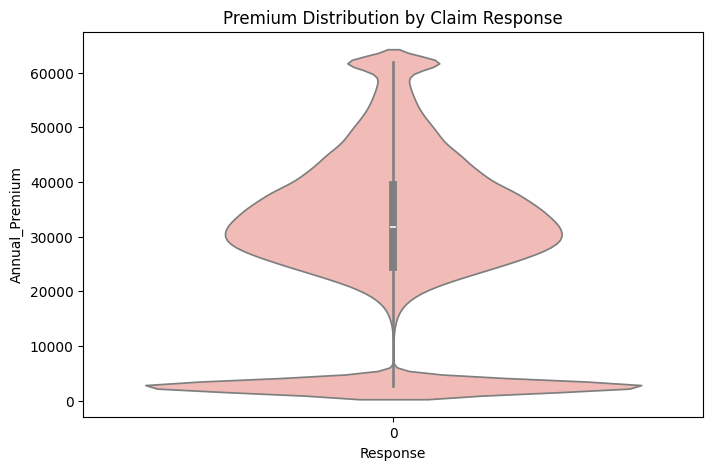

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Response', y='Annual_Premium', data=df, palette='Pastel1')
plt.title('Premium Distribution by Claim Response')
plt.show()


###Bar Plot for Average Vehicle Age by Region



/tmp/ipython-input-1191894643.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region_Code', y='Vehicle_Age', data=df, estimator='mean', ci=None, palette='dark')
/tmp/ipython-input-1191894643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region_Code', y='Vehicle_Age', data=df, estimator='mean', ci=None, palette='dark')


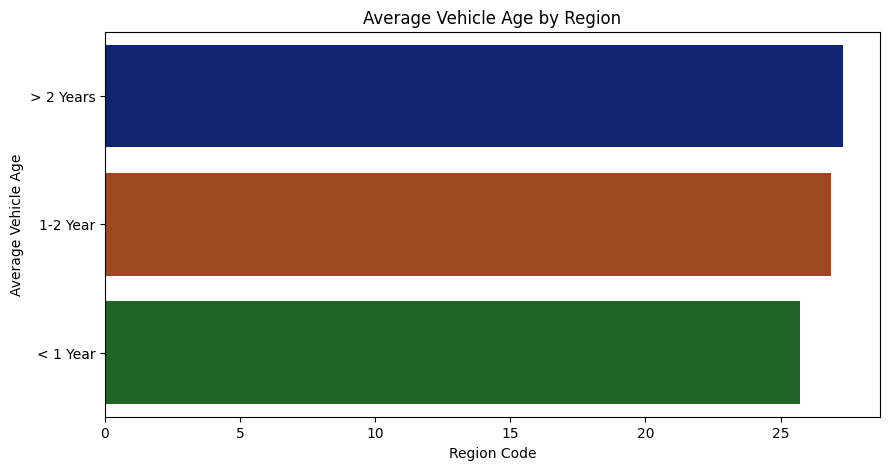

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region_Code', y='Vehicle_Age', data=df, estimator='mean', ci=None, palette='dark')
plt.title('Average Vehicle Age by Region')
plt.xlabel('Region Code')
plt.ylabel('Average Vehicle Age')
plt.show()


##Feature Analysis:
##Examine the relationship between features and the target variable (insurance claims).

####Correlation Matrix: Features and Insurance Claims

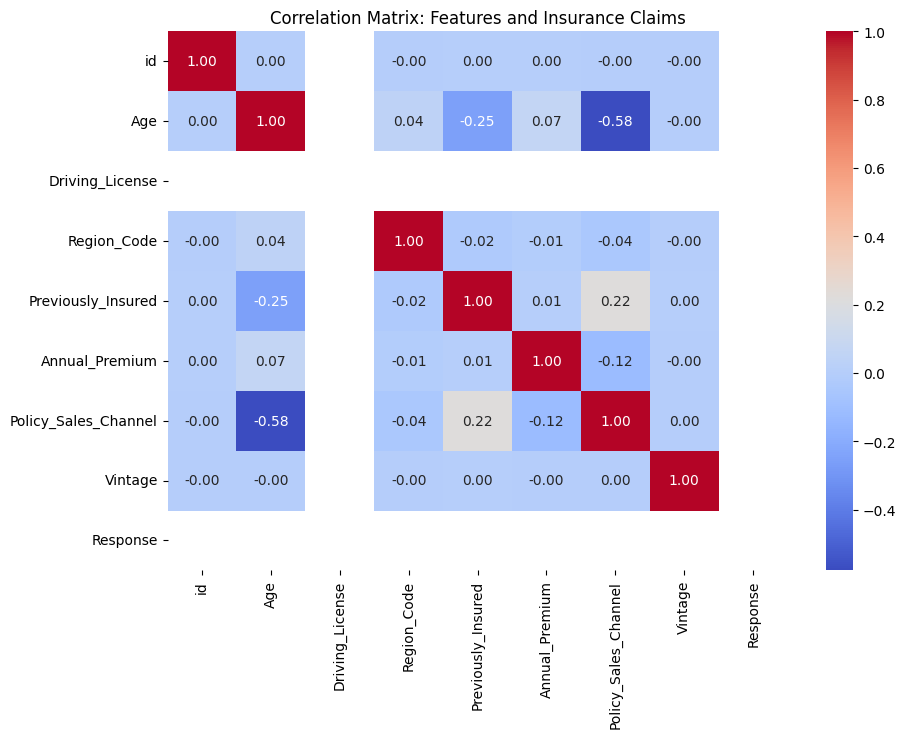

In [ ]:
num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Features and Insurance Claims')
plt.show()


####Annual Premium Distribution by Claim Status

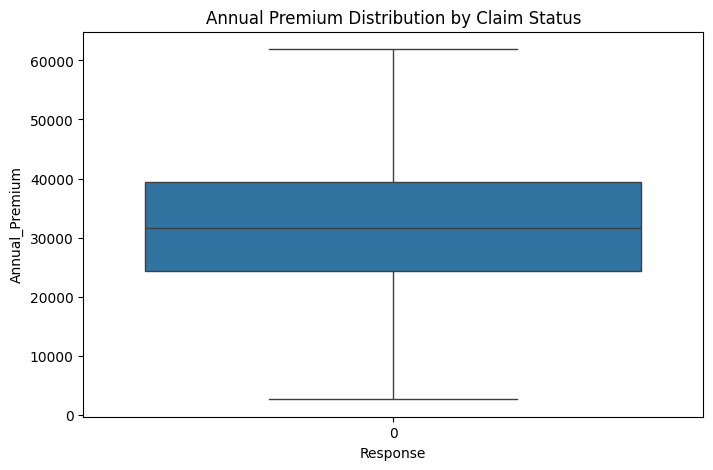

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Annual Premium Distribution by Claim Status')
plt.show()


####Vehicle Age Distribution by Claim Status

/tmp/ipython-input-1620182310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Response', y='Vehicle_Age', data=df, jitter=True, palette='Set2')


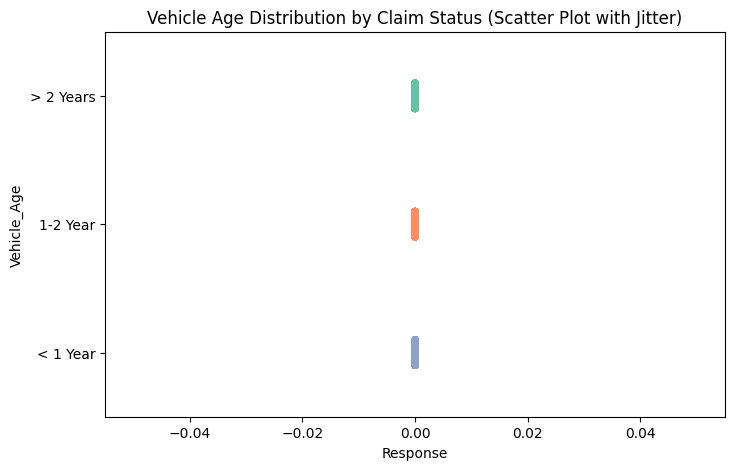

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Response', y='Vehicle_Age', data=df, jitter=True, palette='Set2')
plt.title('Vehicle Age Distribution by Claim Status (Scatter Plot with Jitter)')
plt.show()


####Age Distribution by Claim Status

/tmp/ipython-input-2185223707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Response', y='Age', data=df, palette='muted')


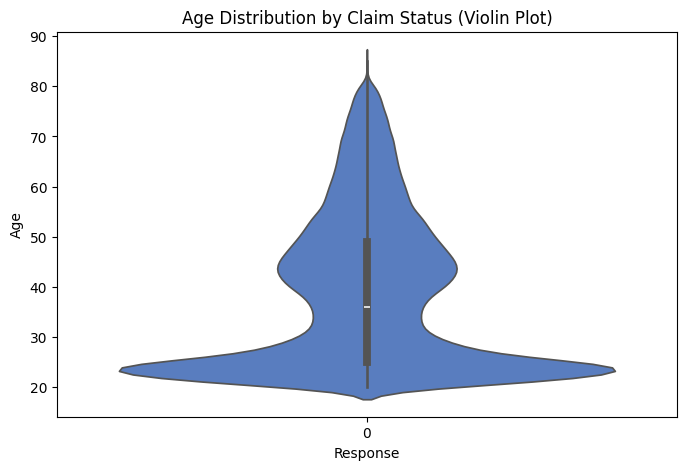

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Response', y='Age', data=df, palette='muted')
plt.title('Age Distribution by Claim Status (Violin Plot)')
plt.show()


##Age Distribution:
###Analyze the age distribution within the dataset and its impact on insurance claims.

#### Age Distribution Plot

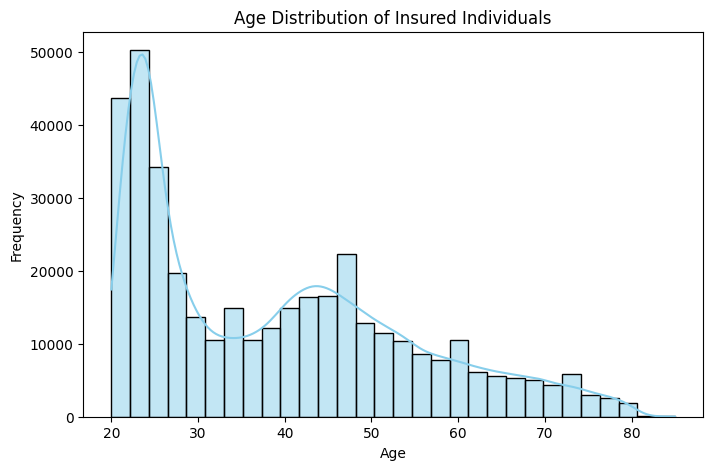

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Insured Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


####Age Distribution by Claim Status


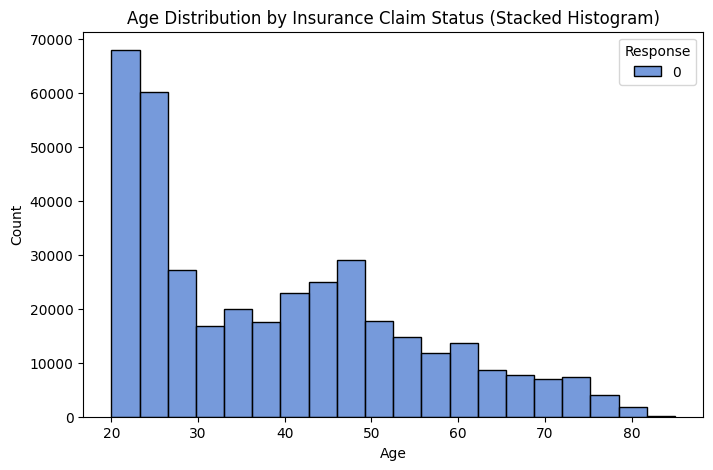

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Response', multiple='stack', palette='muted', bins=20)
plt.title('Age Distribution by Insurance Claim Status (Stacked Histogram)')
plt.show()


##Premium Analysis:
###Investigate the distribution of insurance premiums and their correlation with claim frequencies

####Premium Distribution Plot

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Annual_Premium'], bins=30, kde=True, color='navy')
plt.title('Insurance Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()


####Premium Distribution by Claim Status

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='Annual_Premium', data=df, palette='pastel')
plt.title('Premium Distribution by Claim Status')
plt.show()


####Correlation between Premium and Claims

In [ ]:
correlation = df['Annual_Premium'].corr(df['Response'])
print(f"Correlation between Annual Premium and Claim (Response): {correlation:.3f}")


####Premium vs Claim Frequency Scatter Plot

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Response', y='Annual_Premium', data=df, jitter=True, palette='Set2')
plt.title('Premium vs Claim Status (Scatter Plot)')
plt.show()


##Claim Frequencies:
###Explore factors contributing to higher claim frequencies

In [ ]:
claim_freq = df['Response'].value_counts()

plt.pie(claim_freq,labels=claim_freq.index,autopct='%1.1f%%',startangle=90)
plt.title("Overall Claim Frequency (%)")
plt.show()


####Vehicle Damage vs Claim

In [ ]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.title("Claim by Vehicle Damage")
plt.show()


####Vehicle Age vs Claim

In [ ]:
sns.pointplot(x='Vehicle_Age', y='Response', data=df, estimator='mean')
plt.title("Claim Probability by Vehicle Age")
plt.show()


####Gender vs Claim


In [ ]:
sns.countplot(x='Gender', hue='Response', data=df, palette='pastel')
plt.title("Claim by Gender")
plt.show()


####Previously Insured vs Claim

In [ ]:
sns.countplot(x='Previously_Insured', hue='Response', data=df, palette='coolwarm')
plt.title("Claim by Previously Insured")
plt.show()


####Age vs Claim

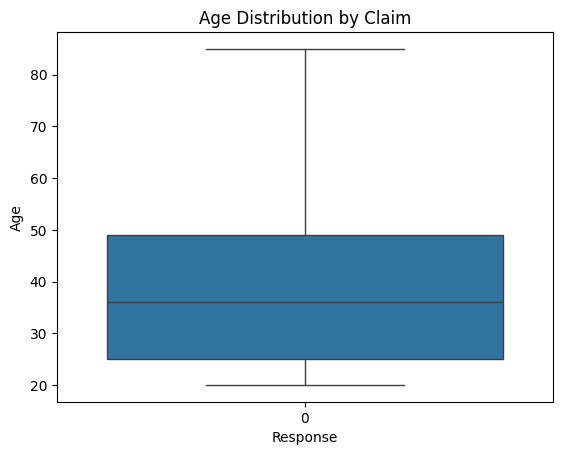

In [ ]:
sns.boxplot(x='Response', y='Age', data=df)
plt.title("Age Distribution by Claim")
plt.show()


####Annual Premium vs Claim

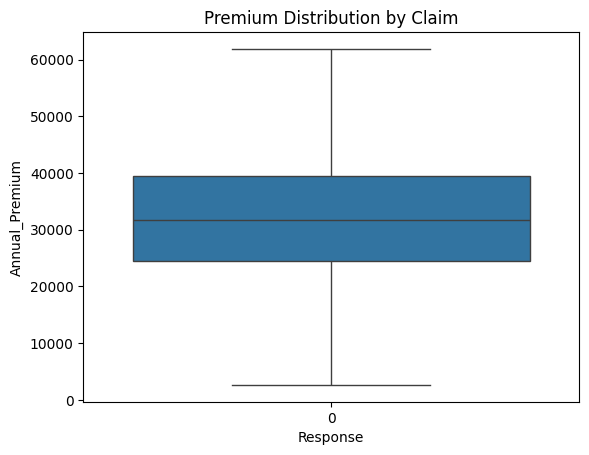

In [ ]:
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title("Premium Distribution by Claim")
plt.show()


##Gender Analysis:
###Investigate the role of gender in insurance claims

####Gender-wise Claim Distribution


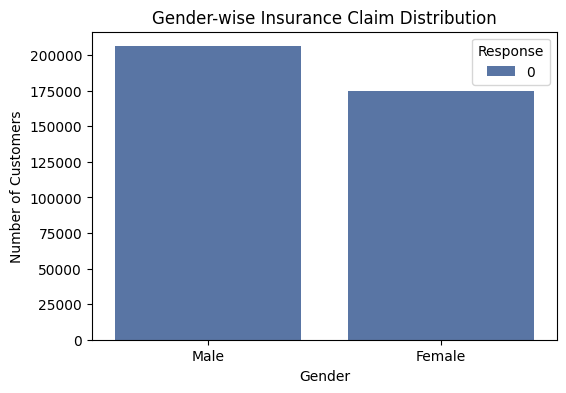

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Response', data=df, palette='deep')
plt.title("Gender-wise Insurance Claim Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

####Average Claim Probability by Gender

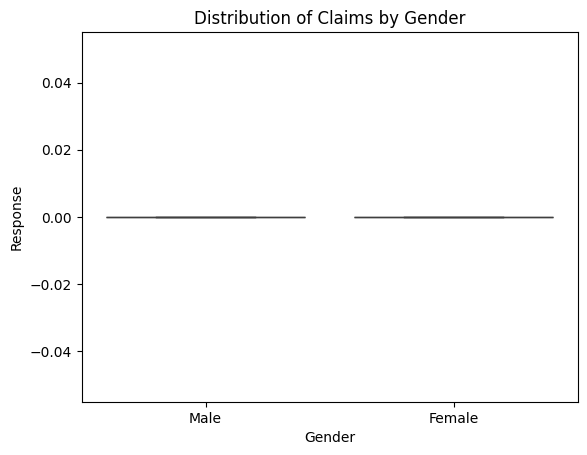

In [ ]:
sns.boxplot(x='Gender', y='Response', data=df)
plt.title("Distribution of Claims by Gender")
plt.show()


####Gender Proportion in Dataset

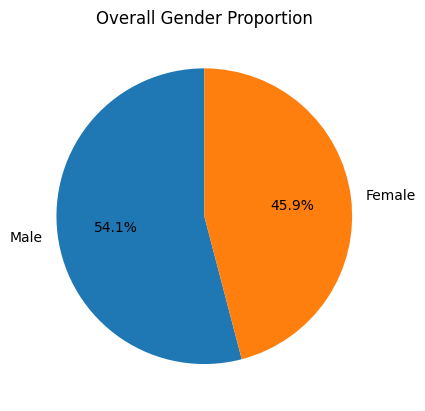

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Overall Gender Proportion")
plt.show()

##Vehicle Age and Claims:
####Examine the impact of vehicle age on the likelihood of a claim.

/tmp/ipython-input-1707221923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Age', y='Response', data=df, palette='pastel')


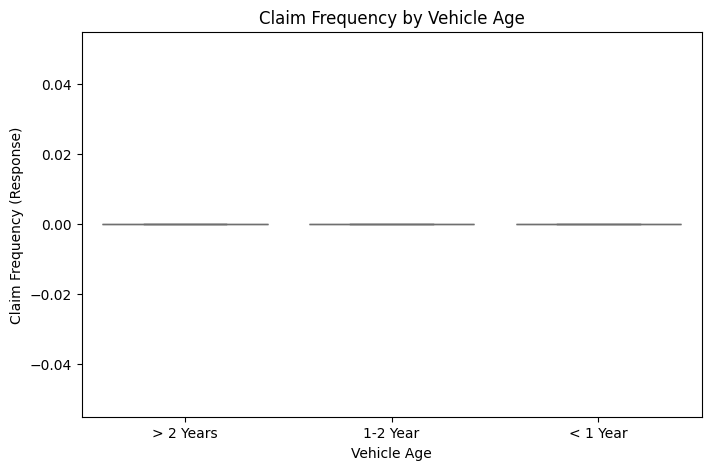

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Vehicle_Age', y='Response', data=df, palette='pastel')
plt.title('Claim Frequency by Vehicle Age')
plt.ylabel('Claim Frequency (Response)')
plt.xlabel('Vehicle Age')
plt.show()